In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
%matplotlib inline
plt.style.use('seaborn-darkgrid')

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


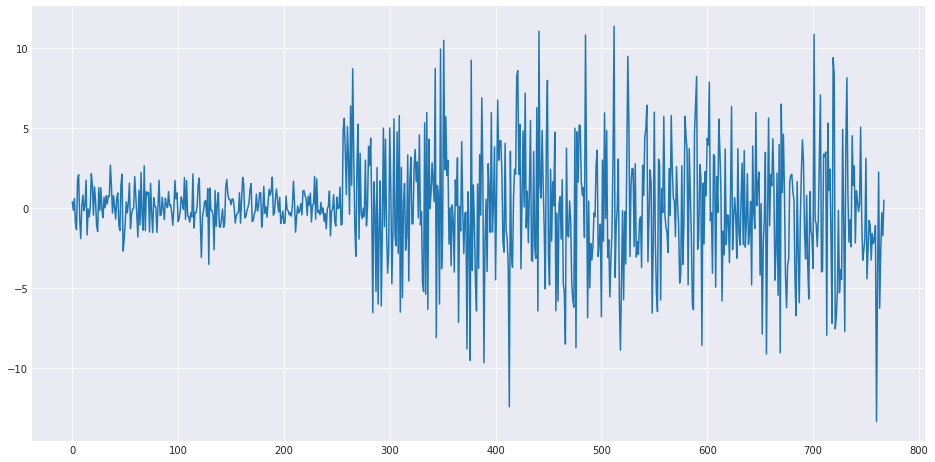

In [2]:
size = 256
y1 = np.random.randn(size)
y2 = np.random.randn(size * 2) * 4
y = np.hstack([y1, y2])
x = np.array(range(y.shape[0]))

plt.figure(figsize=(16,8))
plt.plot(x, y);

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Slice: [sigma_log__]
>Slice: [mu]
>Slice: [changepoint]
100%|██████████| 1000/1000 [00:03<00:00, 270.25it/s]


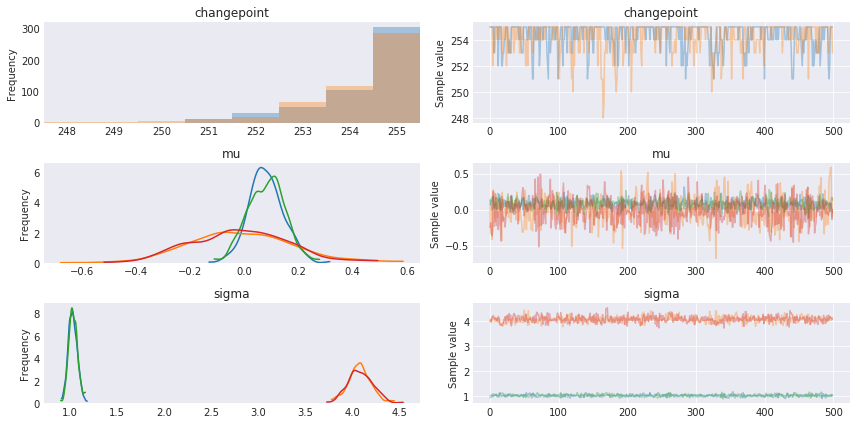

In [3]:
import pymc3 as pm

model = pm.Model()
with model:
    changepoint = pm.DiscreteUniform('changepoint', lower=x[0], upper=x[-1])
    mu = pm.Normal('mu', mu=0, sd=100, shape=2)
    sigma = pm.HalfNormal('sigma', sd=100, shape=2)
    before_or_after = (x > changepoint) * 1
    y_obs = pm.Normal('y_obs', mu=mu[before_or_after], sd=sigma[before_or_after], observed=y)

    step =  pm.Slice()
    trace = pm.sample(step=step)
    pm.traceplot(trace);

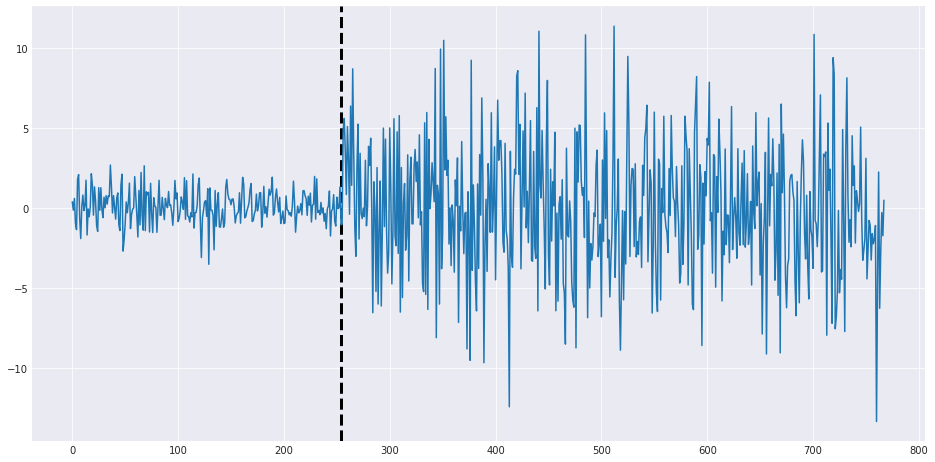

In [4]:
plt.figure(figsize=(16,8))
plt.axvline(trace.get_values('changepoint').mean(), linestyle='--', color='black', linewidth=3)
plt.plot(x, y);